In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [3]:
url="https://www.forbes.com/real-time-billionaires/"
headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36", 
    "X-Amzn-Trace-Id": "Root=1-629df64b-35e6f82a4d3ac5b762bfa437"}
page=requests.get(url, headers=headers)
soup=BeautifulSoup(page.content,"html.parser")
soup1=BeautifulSoup(soup.prettify(),"html.parser")

In [6]:
soup1.find_all("tbody")

[]

In [2]:
Forbes_df=pd.read_csv('2022_forbes_billionaires.csv',index_col=0)

In [3]:
Forbes_df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [4]:
Forbes_df.tail()

,rank,name,networth,age,country,source,industry
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [5]:
Forbes_df.iloc[345]

rank                             343
name        Carrie Perrodo & family 
networth                        $7 B
age                               71
country                       France
source                           oil
industry                     Energy 
Name: 345, dtype: object

In [6]:
Forbes_df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [7]:
Forbes_df['networth']=Forbes_df['networth'].apply(lambda x:x.replace('$','')).apply(lambda x:x.replace('B','')).apply(lambda x:x.replace(' ','')).astype(np.float64)

In [8]:
Forbes_df=Forbes_df.rename(columns={'rank':'Rank','networth':'Networth($ Billion)','name':'Name','age':'Age','country':'Country','source':'Source','industry':'Industry'})

In [9]:
Forbes_df.isnull().sum()

Rank                   0
Name                   0
Networth($ Billion)    0
Age                    0
Country                0
Source                 0
Industry               0
dtype: int64

Then we are good to go. First Analysis is Top 10 richest in the world

<ipython-input-10-b22c1dfe738d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=Forbes_df['Name'][:11], rotation=90)


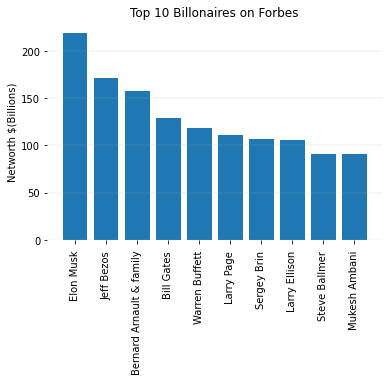

In [10]:
fig,ax=plt.subplots()
ax.bar(Forbes_df['Name'][:10],Forbes_df['Networth($ Billion)'][:10])
[s.set_visible(False) for s in ax.spines.values()]
ax.set_title('Top 10 Billonaires on Forbes')
ax.set_ylabel('Networth $(Billions)')
ax.set_xticklabels(labels=Forbes_df['Name'][:11], rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

This shows the top 10 billonaires on Forbes. Coming up on Number 1 is Elon Musk that seem to be far ahead the number two which is Jeff Bezoz. 

Question number two is to show the country with the highest number of forbe lists

In [11]:
Forbes_df['Country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [12]:
len(Forbes_df['Country'].unique())

75

In [13]:
Forbes_df.groupby('Country').size()

Country
Algeria            1
Argentina          6
Australia         44
Austria           11
Barbados           1
                ... 
United States    719
Uruguay            2
Venezuela          1
Vietnam            7
Zimbabwe           1
Length: 75, dtype: int64

In [14]:
Country_counts=Forbes_df.groupby('Country').size()

In [15]:
Country_counts=Country_counts.to_frame()

In [16]:
Country_counts=Country_counts.rename(columns={0:'Count'})

In [17]:
Country_counts=Country_counts.sort_values(by='Count',ascending=False)

In [18]:
Country_counts

,Count
Country,
United States,719
China,515
India,161
Germany,130
Russia,81
...,...
Eswatini (Swaziland),1
Estonia,1
Belize,1


<ipython-input-19-37c95f1a4da8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=Country_counts.index, rotation=90)


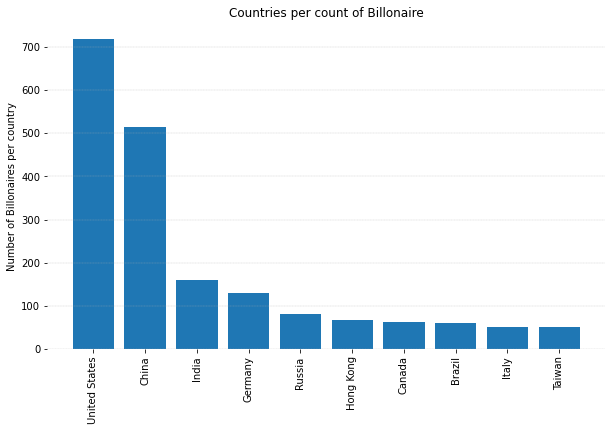

In [19]:
fig,ax2=plt.subplots(figsize=(10,6))
ax2.bar(Country_counts.index[:10],Country_counts['Count'][:10])
[s.set_visible(False) for s in ax2.spines.values()]
ax2.set_title('Countries per count of Billonaire')
ax2.set_ylabel('Number of Billonaires per country')
ax2.set_xticklabels(labels=Country_counts.index, rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

Since the countries were as much as 25, I could decide to split the plots and plot them in 10s but different axes but that doesn't make any sense because from the plot, it is eviident that as from Hong Kong, the difference isn;t that wide anymore between country counts. this shows that on 2022 Forbes list, America has the highest number of people on it. Follow by China and then India. Germany Comes fouth and Russia %th. There are lots of Asian countries here but i'm not sure of Africa. This should prompt my next question which is how many africans are there?

The dataset does not have a column for Continent but I can create a list of all African countries and then create a function from it to check which countries meet up. Let's try.

In [20]:
Africa=[ 'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verd','Central African Republic',
        'Chad','Comoros','Congo-Brazzaville','Congo-Kinshasa',"Côte d'Ivoire",'Djibouti','Egypt','Equatorial Guinea','Eritrea',
        'Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malaw',
        'Mali','Mauritania','Mauritius','Mayotte','Morocco','Mozambique','Namibia','Niger', 'Nigeria','Reunion','Rwanda',
        'Saint Helena','Sao Tome and Príncipe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','Sudan',
        'Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara(SADR)','Zambia','Zimbabwe']

In [21]:
Country_in_list=[]
for Country in Africa:
    if Country in Country_counts.index:
        Country_in_list.append(Country)

In [22]:
Country_in_list

['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']

Apparently, there are seven African countries present in the list. The country with the highest count would be:

In [23]:
Country_counts.loc[['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']]

,Count
Country,
Algeria,1
Egypt,6
Morocco,2
Nigeria,3
South Africa,5
Tanzania,1
Zimbabwe,1


This shows Egypt has the highest number, follow by South Africa, follow by Nigeria and then Morroco. As a Nigerians, I'm interested in knowing the Nigerian so I might just dig a little deeper. 

In [24]:
Forbes_df['Country'][Forbes_df['Country']=='Nigeria'].index.tolist()


[129, 323, 359]

In [25]:
Nigerian_Billonaires=Forbes_df.iloc[[129,323,359]]

<ipython-input-26-22d37a34164a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=Nigerian_Billonaires['Name'])


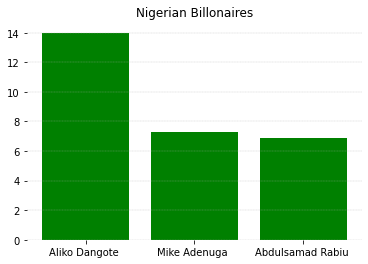

In [26]:
fig,ax3=plt.subplots()
ax3.bar(Nigerian_Billonaires['Name'],Nigerian_Billonaires['Networth($ Billion)'],color='green')
[s.set_visible(False) for s in ax3.spines.values()]
ax3.set_title('Nigerian Billonaires')
ax.set_ylabel('Networth $(Billions)')
ax3.set_xticklabels(labels=Nigerian_Billonaires['Name'])
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

I thinks as a Nigerian the first two is expected but the last one, I don't know who he is. Also, point to note that this means dangote is richer than the Kardashians. 

The next question is what industry generates the most billonaire in the world? okay, let's dig in

In [27]:
Forbes_df['Industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [28]:
Forbes_df['Industry']=Forbes_df['Industry'].apply(lambda x:x.replace(' ',''))

In [29]:
Industry_count=Forbes_df.groupby('Industry').size()

In [30]:
Industry_count=Industry_count.to_frame()
Industry_count=Industry_count.rename(columns={0:'Count'})
Industry_count=Industry_count.sort_values(by='Count',ascending=False)

In [31]:
Industry_count

,Count
Industry,
Finance&Investments,386
Technology,329
Manufacturing,322
Fashion&Retail,246
Healthcare,212
Food&Beverage,201
RealEstate,189
Diversified,178
Media&Entertainment,95


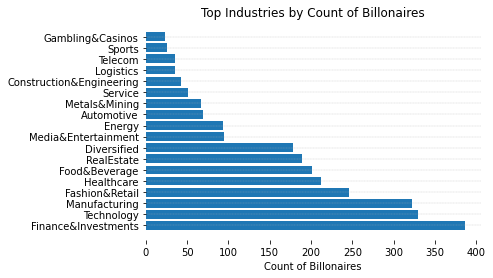

In [32]:
fig,ax4=plt.subplots()
[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(Industry_count.index,Industry_count['Count'])
ax4.set_title('Top Industries by Count of Billonaires')
ax4.set_xlabel('Count of Billonaires')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

well, that is that about that. Now, I'll check the relationship between money and age. 

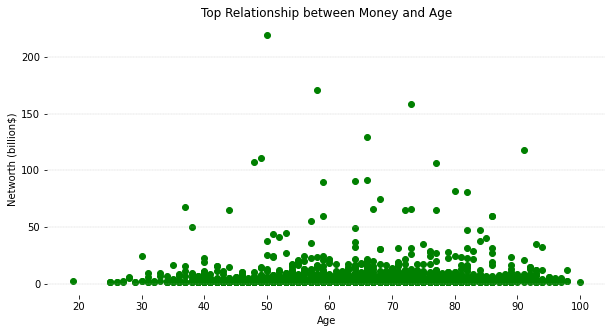

In [33]:
fig,ax5=plt.subplots(figsize=(10,5))
ax5.scatter(Forbes_df['Age'],Forbes_df['Networth($ Billion)'],color='green')
[s.set_visible(False) for s in ax5.spines.values()]
ax5.set_title('Top Relationship between Money and Age')
ax5.set_xlabel('Age')
ax5.set_ylabel('Networth (billion$)')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

This shows there is no relationship between age and money. 

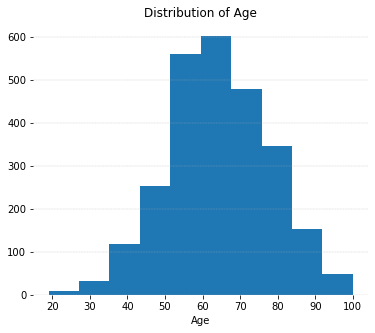

In [34]:
fig, ax6 = plt.subplots(figsize=(6,5))
ax6.hist(Forbes_df['Age'])
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Distribution of Age')
ax6.set_xlabel('Age')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [35]:
By_Age=Forbes_df.sort_values(by='Age',ascending=True)

In [36]:
By_Age

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion&Retail
2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals&Mining
1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance&Investments
2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance&Investments
...,...,...,...,...,...,...,...
1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance&Investments
1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food&Beverage
162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified


C:\Users\Alimi\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


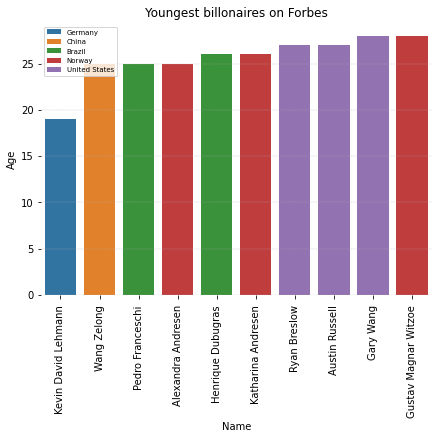

In [37]:
fig, ax6 = plt.subplots(figsize=(7,5))
sns.barplot(By_Age['Name'][:10],By_Age['Age'][:10],hue=By_Age['Country'][:10],dodge=False)
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Youngest billonaires on Forbes')
ax6.set_ylabel('Age')
ax6.set_xticklabels(labels=By_Age['Name'][:10],rotation=90)
ax6.legend(fontsize=7,loc='upper left')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [38]:
Forbes_df.loc[Forbes_df['Name'].str.contains("beyonce&rihanna&kadarshian&Jayz&Ronaldo", case=False)]

,Rank,Name,Networth($ Billion),Age,Country,Source,Industry


In [49]:
Forbes_dfa=Forbes_df.set_index(keys='Country')

In [57]:
Forbes_dfa=Forbes_dfa.loc[['Algeria',
 'Egypt',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tanzania',
 'Zimbabwe']]

In [59]:
Forbes_dfa=Forbes_dfa.sort_values(by='Networth($ Billion)',ascending=False)

C:\Users\Alimi\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


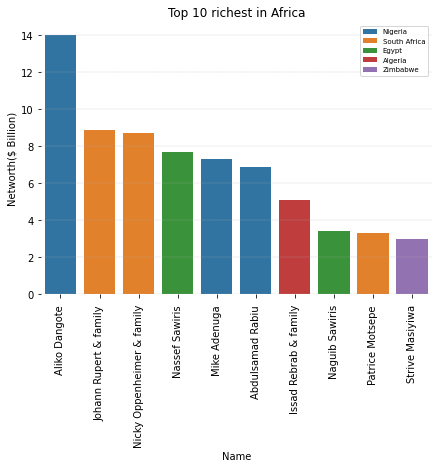

In [63]:
fig, ax7 = plt.subplots(figsize=(7,5))
sns.barplot(Forbes_dfa['Name'][:10],Forbes_dfa['Networth($ Billion)'][:10],hue=Forbes_dfa.index[:10],dodge=False)
[s.set_visible(False) for s in ax7.spines.values()]
ax7.set_title('Top 10 richest in Africa')
ax7.set_ylabel('Networth($ Billion)')
ax7.set_xticklabels(labels=Forbes_dfa['Name'][:10],rotation=90)
ax7.legend(fontsize=7,loc='upper right')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()